In [1]:
import os
from rdkit import Chem
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import get_experiments

In [2]:
d = "ga_hyper1"
e = get_experiments(d)
palette = sns.color_palette("Spectral", 6)[::-1]
palette2 = sns.color_palette("Spectral", 6)[::5]

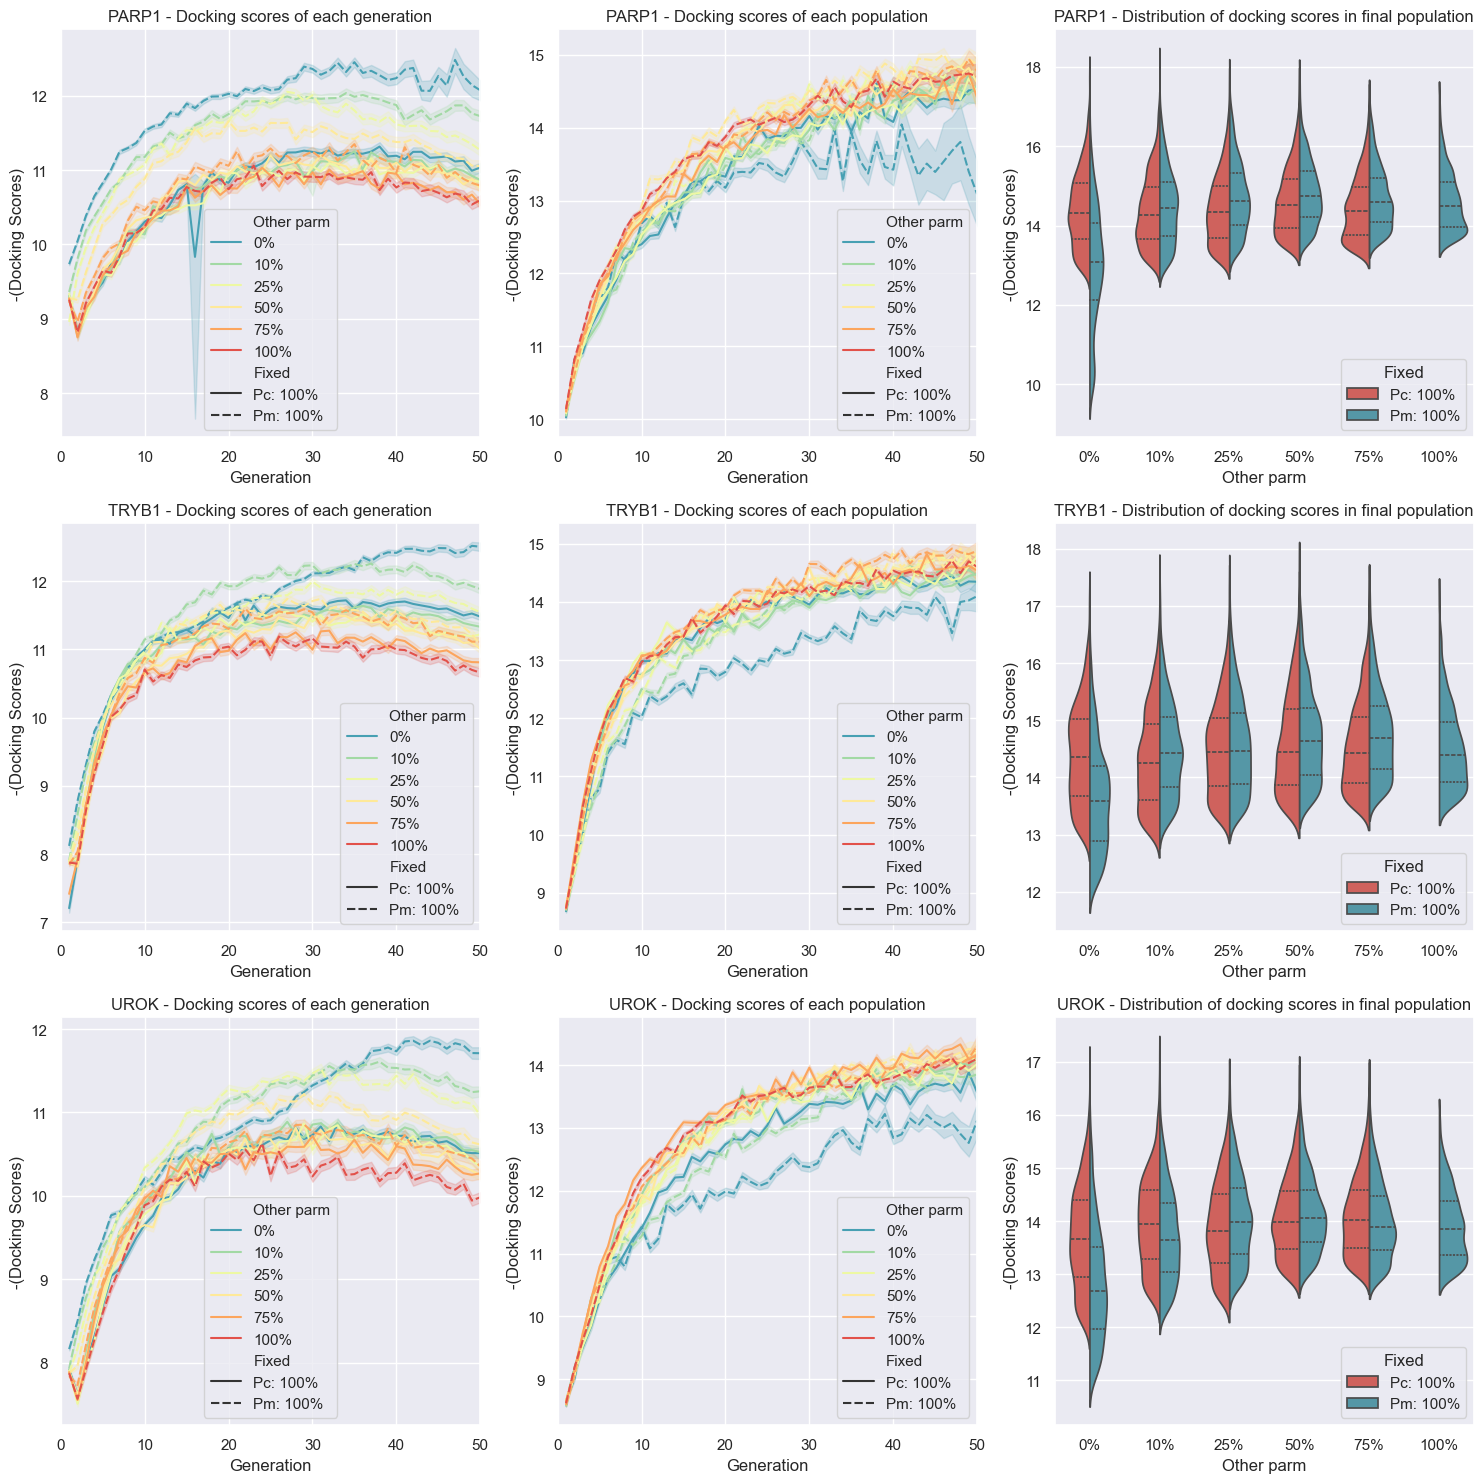

In [3]:
sns.set_theme()
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for k, (t, subset) in enumerate(e.groupby("Target")):
    subset.Pm = subset.Pm.astype(float)
    subset.Pc = subset.Pc.astype(float)
    subset = subset.sort_values(["Pm", "Pc"])
    # Generation docking scores
    combined = None
    ax = axes[k,0]
    for _, row in subset.iterrows():
        df = pd.concat([pd.read_parquet(f"{row.path}/gen_{n}.parquet") for n in range(1,51)])
        if row.Pm == 1.0:
            df["Fixed"] = "Pm: 100%"
            df["Other parm"] = f"{int(row.Pc*100)}%"
        else:
            df["Fixed"] = "Pc: 100%"
            df["Other parm"] = f"{int(row.Pm*100)}%"
        combined = pd.concat([combined, df])
    sns.lineplot(combined, x="generation", y="scores", hue="Other parm", style="Fixed", palette=palette, ax=ax)
    ax.set_xlabel("Generation")
    ax.set_ylabel("-(Docking Scores)")
    ax.set_xlim(0,50)
    ax.set_title(f"{t} - Docking scores of each generation")
    ax = axes[k,1]

    # Population docking scores
    combined = None
    for _, row in subset.iterrows():
        df = pd.concat([pd.read_parquet(f"{row.path}/pop_{n}.parquet") for n in range(1,51)])
        if row.Pm == 1.0:
            df["Fixed"] = "Pm: 100%"
            df["Other parm"] = f"{int(row.Pc*100)}%"
        else:
            df["Fixed"] = "Pc: 100%"
            df["Other parm"] = f"{int(row.Pm*100)}%"
        combined = pd.concat([combined, df])
    sns.lineplot(combined, x="generation", y="scores", hue="Other parm", style="Fixed", palette=palette, ax=ax)
    ax.set_xlabel("Generation")
    ax.set_ylabel("-(Docking Scores)")
    ax.set_xlim(0,50)
    ax.set_title(f"{t} - Docking scores of each population")

    # Violin plot final population
    ax = axes[k,2]
    combined = None
    for _, row in subset.iterrows():
        df = pd.read_parquet(f"{row.path}/pop_50.parquet")
        if row.Pm == 1.0:
            df["Fixed"] = "Pm: 100%"
            df["Other parm"] = f"{int(row.Pc*100)}%"
        else:
            df["Fixed"] = "Pc: 100%"
            df["Other parm"] = f"{int(row.Pm*100)}%"
        combined = pd.concat([combined, df])
    sns.violinplot(combined, y="scores", x="Other parm", hue="Fixed", split=True, inner="quart", ax=ax, palette=palette2)
    ax.set_title(f"{t} - Distribution of docking scores in final population")
    ax.set_ylabel("-(Docking Scores)")

plt.tight_layout()
plt.savefig("../figures/ga_cor_mr.pdf")